Evolution of the Running Back in Football

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rbs = pd.read_csv('Game_Logs_Runningback.csv')

In [3]:
rbs = rbs[rbs['Season'] == 'Regular Season']

In [4]:
rbs.head()

,Player Id,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,...,Yards Per Carry,Longest Rushing Run,Rushing TDs,Receptions,Receiving Yards,Yards Per Reception,Longest Reception,Receiving TDs,Fumbles,Fumbles Lost
0,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,7,10/20,Away,ATL,L,...,--,--,--,--,--,--,--,--,--,--
1,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,8,10/27,Home,NYG,L,...,--,--,--,--,--,--,--,--,--,--
2,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,9,11/03,Away,RAM,L,...,--,--,--,3,27,9.0,10,0,--,--
3,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,10,11/10,Home,SEA,L,...,--,--,--,--,--,--,--,--,--,--
4,bobbyfowler/2514295,"Fowler, Bobby",NaN,1985,Regular Season,11,11/17,Away,GB,L,...,1.0,1,0,--,--,--,--,--,--,--


In [5]:
rbs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58187 entries, 0 to 67657
Data columns (total 25 columns):
Player Id              58187 non-null object
Name                   58187 non-null object
Position               8560 non-null object
Year                   58187 non-null int64
Season                 58187 non-null object
Week                   58187 non-null int64
Game Date              58187 non-null object
Home or Away           58187 non-null object
Opponent               58187 non-null object
Outcome                58187 non-null object
Score                  58187 non-null object
Games Played           58187 non-null int64
Games Started          58187 non-null object
Rushing Attempts       58187 non-null object
Rushing Yards          58187 non-null object
Yards Per Carry        58187 non-null object
Longest Rushing Run    58187 non-null object
Rushing TDs            58187 non-null object
Receptions             58187 non-null object
Receiving Yards        58187 non-null ob

In [6]:
rbs = rbs[rbs['Rushing Attempts'] != '--']

In [7]:
rbs['Rushing Attempts'] = rbs['Rushing Attempts'].astype('int')
rbs['Rushing TDs'] = rbs['Rushing TDs'].astype('int')

In [8]:
backs = rbs.groupby([ 'Year', 'Week','Player Id','Name', 'Opponent']).agg({'Rushing Attempts' : 'sum', 'Rushing TDs' :'sum', 'Games Played' : 'sum'})

In [9]:
backs.tail()

Rushing TDs  \
Year Week Player Id            Name           Opponent                
2016 17   thomasrawls/2553733  Rawls, Thomas  SF                  1   
          timhightower/4383    Hightower, Tim ATL                 1   
          toddgurley/2552475   Gurley, Todd   ARI                 0   
          tymontgomery/2552429 Montgomery, Ty DET                 0   
          zachzenner/2553631   Zenner, Zach   GB                  1   

                                                        Rushing Attempts  \
Year Week Player Id            Name           Opponent                     
2016 17   thomasrawls/2553733  Rawls, Thomas  SF                       8   
          timhightower/4383    Hightower, Tim ATL                      3   
          toddgurley/2552475   Gurley, Todd   ARI                     14   
          tymontgomery/2552429 Montgomery, Ty DET                      8   
          zachzenner/2553631   Zenner, Zach   GB                      20   

                                                        Games Played  
Year Week Player Id            Name           Opponent                
2016 17   thomasrawls/2553733  Rawls, Thomas  SF                   1  
          timhightower/4383    Hightower, Tim ATL                  1  
          toddgurley/2552475   Gurley, Todd   ARI                  1  
          tymontgomery/2552429 Montgomery, Ty DET                  1  
          zachzenner/2553631   Zenner, Zach   GB                   1

In [10]:
rbacks = backs.groupby(['Year', 'Week', 'Opponent']).agg({'Rushing Attempts' : 'sum', 'Rushing TDs' : 'sum', 'Games Played': 'count'})

In [11]:
rbacks.head(10)

Rushing TDs  Rushing Attempts  Games Played
Year Week Opponent                                             
1970 1    ATL                 0                15             2
          BAL                 0                14             2
          BOS                 1                 9             2
          BUF                 1                26             2
          CHI                 0                13             1
          CIN                 0                 2             1
          CLE                 0                 1             1
          DAL                 0                 3             1
          DEN                 0                 9             2
          DET                 0                15             3

In [12]:
rbacks['Carries per Game'] = rbacks['Rushing Attempts'] / rbacks['Games Played']

In [13]:
years = rbacks.groupby(['Year']).agg({'Rushing TDs' : 'mean', 'Rushing Attempts' : 'mean', 'Carries per Game' : 'mean'})

More rushing attempts with time

In [14]:
years


,Rushing TDs,Rushing Attempts,Carries per Game
Year,,,
1970,0.433022,16.685358,9.849688
1971,0.468278,17.184290,9.093404
1972,0.494012,19.104790,9.980988
1973,0.413174,17.335329,9.544311
1974,0.476190,17.398810,8.514633
1975,0.620178,20.759644,9.493472
1976,0.540323,20.139785,10.092787
1977,0.469914,20.489971,10.051624
1978,0.493766,18.947631,9.256401


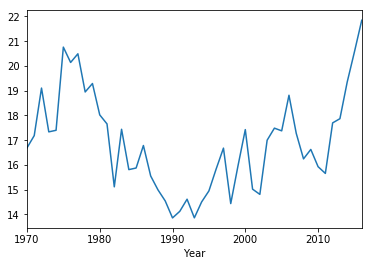

In [61]:
years['Rushing Attempts'].plot()